# AAS HW11
I had not added Plots at home!

In [1]:
import Pkg; Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


Doing all the computation together!

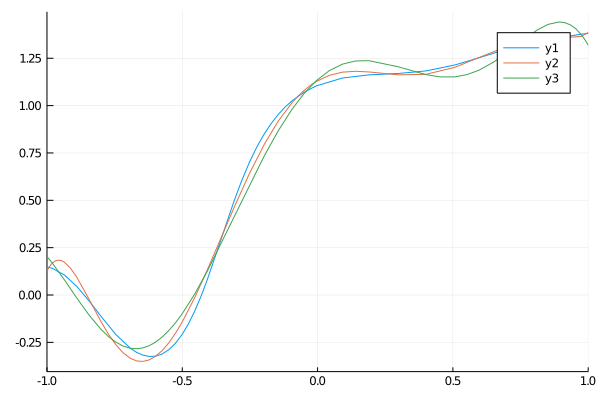

In [35]:
using LinearAlgebra, Plots
# Polynomialas for fit
function ps(x)
    [1 x x^2 x^3 x^4 x^5 x^6 x^7]
end

# trig for fit
function ts(x)
    [1 sin(x) cos(x) sin(2*x) cos(2*x) sin(3*x) cos(3*x)]
end

# Fit target
function f(x)
    atan(1 + 3*sin(x) + cos(3*x)^2 + log(1+x^2))
end

# x values
m=23
(a,b)=(-1,1)
xs = a:(b-a)/(m-1):b

# y values
fs = map(f,xs)

# Polynomial and Trig Matrices
Ap = zeros(m,8)
At = zeros(m,7)
for i in 1:m
    Ap[i,:] = ps(xs[i])
    At[i,:] = ts(xs[i])
end

# Using pseudo inverse to construct least square fits
ap = pinv(Ap)*fs
at = pinv(At)*fs
plot([f,x->dot(ap,ps(x)),x->dot(at,ts(x))], 
    xlims= (a,b)
    )

y1 is the function, y2 is the polynomial fit and y3 is the trig fit! I would say they are about equally good or bad.

Changing the linear Algebra. We have different possibilities: QR, Projective aka Normal Equatsions, SVD, pinv.
I am going to look at the coefficients I get for the poly fit with the different possibilities. 

Not surprisingly, they are all essentially the same!

In [74]:
apPINV = pinv(Ap)*fs
# QR Solve need to make Q thin!
(Q,R) = qr(Ap)
Q=Matrix(Q)
apQR = R\Q'*fs
# Normal equation Solve
apNormal = (Ap'*Ap)\(Ap'*fs)
# SVD solve.  Reverse factors and invert inner diagonal matrix
(U,S,V) = svd(Ap)
apSVD = V*inv(diagm(0=>S))*U'*fs
map(norm, [apPINV-apQR,apPINV-apNormal,apPINV-apSVD])

3-element Array{Float64,1}:
 1.274421910159637e-13 
 1.2567716410157633e-11
 6.0126546692855795e-15